In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import copy
import missingno as msno


##### loading the csv File

In [4]:
netflix_df = pd.read_csv("C:\\Users\\Keremane\\OneDrive\\Desktop\\Scaler Docs\\Data Sources\\Python Pandas\\netflix.csv")
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix_df.shape

(8807, 12)

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [106]:
netflix_df.describe()

,release_year,year_added,days_difference
count,8807.000000,8807.000000,8807.00000
mean,2014.180198,2018.868741,1895.34518
std,8.819312,1.577157,3209.57282
min,1925.000000,2008.000000,-1006.00000
25%,2013.000000,2018.000000,268.00000
50%,2017.000000,2019.000000,578.00000
75%,2019.000000,2020.000000,2069.00000
max,2021.000000,2021.000000,34331.00000


### Insights Before Data Cleaning

In [7]:
# checking the unique values for columns
for i in ['type','release_year','rating']:
 print('Unique Values in',i,'column are :-')
 print(netflix_df[i].unique())
 print(" ")

Unique Values in type column are :-
['Movie' 'TV Show']
 
Unique Values in release_year column are :-
[2020 2021 1993 2018 1996 1998 1997 2010 2013 2017 1975 1978 1983 1987
 2012 2001 2014 2002 2003 2004 2011 2008 2009 2007 2005 2006 1994 2015
 2019 2016 1982 1989 1990 1991 1999 1986 1992 1984 1980 1961 2000 1995
 1985 1976 1959 1988 1981 1972 1964 1945 1954 1979 1958 1956 1963 1970
 1973 1925 1974 1960 1966 1971 1962 1969 1977 1967 1968 1965 1946 1942
 1955 1944 1947 1943]
 
Unique Values in rating column are :-
['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']
 


In [8]:
#get the duplicate count
netflix_df.duplicated().value_counts()

False    8807
dtype: int64

In [9]:
# checking the value_counts for columns
for i in ['type','release_year','rating','duration']:
 print('Value count in',i,'column are :-')
 print(netflix_df[i].value_counts())
 print(" ")

Value count in type column are :-
Movie      6131
TV Show    2676
Name: type, dtype: int64
 
Value count in release_year column are :-
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1966       1
1925       1
1947       1
1959       1
1961       1
Name: release_year, Length: 74, dtype: int64
 
Value count in rating column are :-
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64
 
Value count in duration column are :-
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
93 min        146
             ... 
205 min         1
200 min         1
189 min         1
203 min         1
194 min         1
Name: duration, Length: 220, dtype: int64
 


### Missing Value Analysis

In [10]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Fill missing column values
##### director -> 'Unknown Director'
##### Cast -> 'unknown cast'
##### country -> 'unknown'
##### Date -> got it from internet
##### Rating -> got it from internet
##### Duration -> Got this from internet

In [11]:
date = {"A Young Doctor's Notebook and Other Stories" : 'September 15, 2014',
 "Anthony Bourdain: Parts Unknown" : 'June 1, 2020',
 "Frasier" : 'April 1, 2015',
 "Friends" : 'January 1, 2015',
 "Gunslinger Girl" : 'January 4, 2016',
 "Kikoriki" : 'July 6, 2017',
 "La Familia P. Luche" : 'June 1, 2015',
 "Maron" : 'November 2, 2018',
 "Red vs. Blue" : 'March 21, 2015',
 "The Adventures of Figaro Pho": 'January 1, 2016'}
for i in date :
 netflix_df.loc[netflix_df['title'] == i, 'date_added'] = date[i]


In [12]:
netflix_df['director'].fillna('Unknown Director',inplace = True)
netflix_df['cast'].fillna('Unknown cast',inplace = True)
netflix_df['country'].fillna('Unknown',inplace = True)

In [13]:
netflix_df.loc[netflix_df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,Unknown Director,"Oprah Winfrey, Ava DuVernay",Unknown,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Unknown Director,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,Unknown Director,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [14]:
ratings = {"13TH: A Conversation with Oprah Winfrey & Ava DuVernay" : 'TV-PG',
 "Gargantia on the Verdurous Planet" : 'TV-PG',
 "Little Lunch" : 'TV-Y',
 "My Honor Was Loyalty" : 'PG-13'}
for i in ratings:
 netflix_df.loc[netflix_df['title'] == i,'rating'] = ratings[i]

In [15]:
#success
netflix_df.loc[netflix_df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [16]:
#same for duration
netflix_df.loc[netflix_df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [17]:
duration = {"Louis C.K. 2017" : '74 min',
 "Louis C.K.: Hilarious" : '83 min',
 "Louis C.K.: Live at the Comedy Store":'65 min'}
for i in duration:
 netflix_df.loc[netflix_df['title'] == i,'duration'] = duration[i]

In [18]:
netflix_df.loc[netflix_df['date_added'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [19]:
# check null values
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Adding columns for seperate analysis like month, year and day

In [20]:
# converting date_added to datetime column
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
#adding new columns
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month_name()
netflix_df['day_added'] = netflix_df['date_added'].dt.day_name()
netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Friday
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Friday


#### Unnesting the columns like  director, cast and country

In [21]:
#creating seperate table to not to disturb original one
df_copy = copy.deepcopy(netflix_df)

df_copy["director"] = netflix_df["director"].str.split(", ")
df_copy["cast"] = netflix_df["cast"].str.split(", ")
df_copy["country"] = netflix_df["country"].str.split(", ")
df_copy["listed_in"] = netflix_df["listed_in"].str.split(", ")

df_copy = df_copy.explode('director')
df_copy = df_copy.explode('cast')
df_copy = df_copy.explode('country')
df_copy = df_copy.explode('listed_in')
df_copy.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,Friday


## Data Visualization

In [22]:
#Movie and Series Distribution
x = netflix_df['type'].value_counts()
x

Movie      6131
TV Show    2676
Name: type, dtype: int64

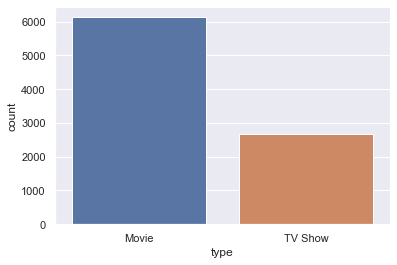

In [23]:
sns.set()
sns.countplot(x="type",data=netflix_df)
plt.show()

##### nongraphical analysis of categorical data

In [24]:
c = df_copy['listed_in'].nunique()
c

42

In [25]:
##Most listed in (Genre) 
print('Value count in Listed_in (Genre) column are :-')
a1 = df_copy['listed_in'].value_counts()
print(a1.sort_values(ascending = False))

Value count in Listed_in (Genre) column are :-
Dramas                          29775
International Movies            28211
Comedies                        20829
International TV Shows          12845
Action & Adventure              12216
Independent Movies               9834
Children & Family Movies         9771
TV Dramas                        8942
Thrillers                        7107
Romantic Movies                  6412
TV Comedies                      4963
Crime TV Shows                   4733
Horror Movies                    4571
Kids' TV                         4568
Sci-Fi & Fantasy                 4037
Music & Musicals                 3077
Romantic TV Shows                3049
Documentaries                    2407
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
Sports Movies                    1531
Classic Movies                   1434
TV Mysteries                     1281
Kor

In [26]:
#Most number of movies done by director
#removing unknown director for getting result
known_ddf = df_copy[df_copy['director'] != 'Unknown Director']
print('Descending order Value count in Director column are :-')
d1 = known_ddf['director'].value_counts()
print(d1.sort_values(ascending = False))


Descending order Value count in Director column are :-
Martin Scorsese        419
Youssef Chahine        409
Cathy Garcia-Molina    356
Steven Spielberg       355
Lars von Trier         336
                      ... 
Sharon Shattuck          1
Mfanelo Ngoma            1
Rayka Zehtabchi          1
Freddie Waters           1
Oscar Micheaux           1
Name: director, Length: 4993, dtype: int64


##### Dividing Movie and TV Shows

In [27]:
#movies only
df_movies = df_copy[df_copy['type'].str.lower()=='movie']
df_movies.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Friday
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Friday
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Friday
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Friday


In [28]:
#TV shows only
df_tvshows = df_copy[df_copy['type'].str.lower()!='movie']
df_tvshows.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021,September,Friday
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021,September,Friday


###### As per Internet i got came to know that "NC-17" is the best rating for Movies and "TV-MA" is ranked as highest for TV show so lets see directors who have given high rate movies or tv shows and cast who were incolved in it and also which month or day its added


In [29]:
#Movies first
#directors count with highest rating NC-17
#cast with this rating
#day which NC-17 released

dir_count_movies = df_movies['director'][df_movies['rating'] == 'NC-17'].value_counts()
dir_count_movies = dir_count_movies[dir_count_movies.index != 'Unknown Director']
print(dir_count_movies)



Abdellatif Kechiche    117
Warren P. Sonoda        20
Name: director, dtype: int64


In [30]:
dir_count_shows = df_tvshows['director'][df_tvshows['rating'] == 'TV-MA'].value_counts()
dir_count_shows = dir_count_shows[dir_count_shows.index != 'Unknown Director']
print(dir_count_shows)

Laïla Marrakchi    104
Houda Benyamina    104
Damien Chazelle    104
Alan Poul          104
Jay Oliva           81
                  ... 
Ken Burns            1
Rashida Jones        1
Ronna Gradus         1
Dawn Porter          1
Jill Bauer           1
Name: director, Length: 180, dtype: int64


##### Graphical data analysis of above  

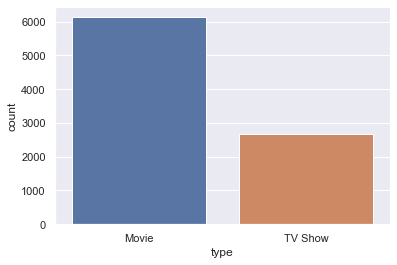

In [31]:
sns.countplot(x = 'type', data = netflix_df)
plt.show()

##### Insights

- We can see the movie counts is way morethan Tv show

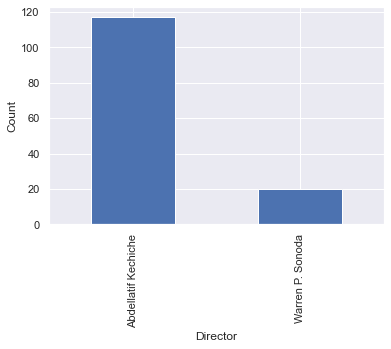

In [32]:
dir_count_movies.plot(x='director', y='count', kind='bar', legend=False)
plt.xlabel('Director')
plt.ylabel('Count')
plt.show()

- Comparing the Movies and TV shows added over the years


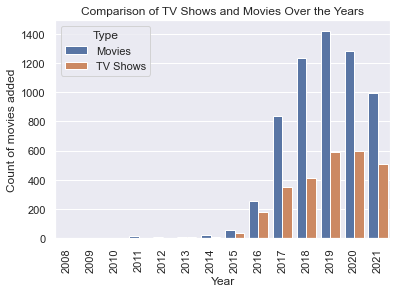

In [105]:
sns.countplot(x='year_added', hue='type', data=netflix_df)
plt.xlabel('Year')
plt.ylabel('Count of movies added')
plt.title('Comparison of TV Shows and Movies Over the Years')
plt.legend(title='Type', loc='upper left', labels=['Movies', 'TV Shows'])
plt.xticks(rotation=90)
plt.show()

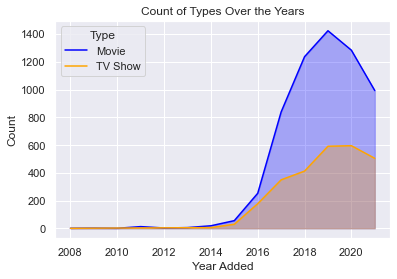

In [34]:
color = ['blue', 'orange']
for i, type_ in enumerate(netflix_df['type'].unique()):
    temp_df = netflix_df.loc[netflix_df['type'] == type_, 'year_added'].value_counts().sort_index()
    sns.lineplot(x=temp_df.index, y=temp_df.values, color=color[i], label=type_)
    plt.fill_between(temp_df.index, 0, temp_df.values, color=color[i], alpha=0.3)

plt.xlabel('Year Added')
plt.ylabel('Count')
plt.title('Count of Types Over the Years')
plt.legend(title='Type')
plt.show()

- We can see the evolution of movies keps increasing over the years

- Top 10 directors who have appeared in most movies or TV shows

In [35]:
d_cnt = df_copy.groupby('director')['title'].nunique().sort_values(ascending = False)[0:11].reset_index()
d_cnt = d_cnt[d_cnt['director'] != 'Unknown Director']
d_cnt.head(10)

,director,title
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


In [107]:
d_cnt.tail()

,director,title
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


#### Insights
- The Top Director having most number of movies is Rajiv Chilaka

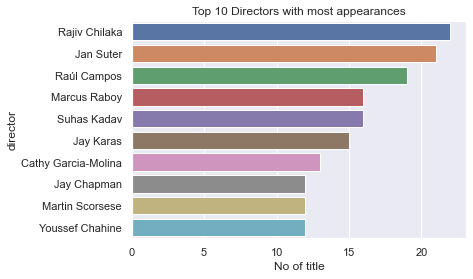

In [36]:
sns.barplot(x = 'title', y = 'director', data = d_cnt)
plt.xlabel("No of title")
plt.title("Top 10 Directors with most appearances")
plt.show()

- Top 10 Actor's who have appeared in most movies or TV shows

In [37]:
c_cnt = df_copy.groupby('cast')['title'].nunique().sort_values(ascending = False)[0:11].reset_index()
c_cnt = c_cnt[c_cnt['cast'] != 'Unknown cast']
c_cnt

,cast,title
1,Anupam Kher,43
2,Shah Rukh Khan,35
3,Julie Tejwani,33
4,Naseeruddin Shah,32
5,Takahiro Sakurai,32
6,Rupa Bhimani,31
7,Om Puri,30
8,Akshay Kumar,30
9,Yuki Kaji,29
10,Paresh Rawal,28


#### Insights
- The Top cast having most number of movies is Anupam Kher

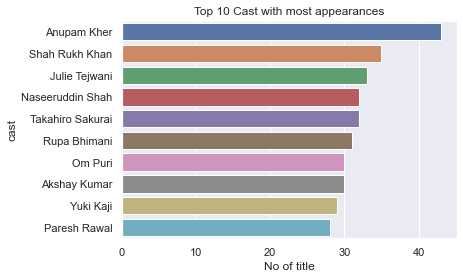

In [38]:
sns.barplot(x = 'title', y = 'cast', data = c_cnt)
plt.xlabel("No of title")
plt.title("Top 10 Cast with most appearances")
plt.show()

- Top 10 Countries which have produced the most Movies and most TV Shows on Netflix.

In [39]:
df_movies = df_movies[df_movies['country'] != 'Unknown']
df_mcnt = df_movies.groupby('country')['title'].nunique().sort_values(ascending = False)[0:10].reset_index()
df_mcnt


,country,title
0,United States,2751
1,India,962
2,United Kingdom,532
3,Canada,319
4,France,303
5,Germany,182
6,Spain,171
7,Japan,119
8,China,114
9,Mexico,111


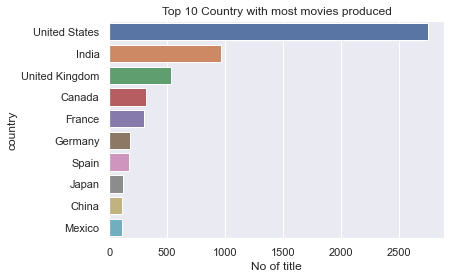

In [40]:
sns.barplot(x = 'title', y = 'country', data = df_mcnt)
plt.xlabel("No of title")
plt.title("Top 10 Country with most movies produced")
plt.show()

#### Insights 
- US having most number of movies produced also in the below with TV shows also

In [41]:
df_tvshows = df_tvshows[df_tvshows['country'] != 'Unknown']
tv_cnt = df_tvshows.groupby('country')['title'].nunique().sort_values(ascending = False)[0:10].reset_index()
tv_cnt

,country,title
0,United States,938
1,United Kingdom,272
2,Japan,199
3,South Korea,170
4,Canada,126
5,France,90
6,India,84
7,Taiwan,70
8,Australia,66
9,Spain,61


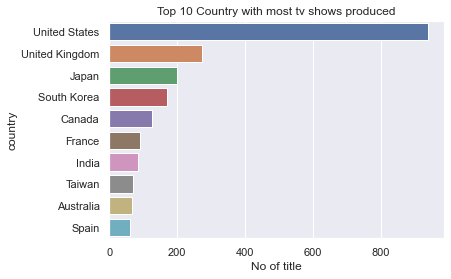

In [42]:
sns.barplot(x = 'title', y = 'country', data = tv_cnt)
plt.xlabel("No of title")
plt.title("Top 10 Country with most tv shows produced")
plt.show()

In [43]:
t_cnt = df_copy[df_copy['country'] != 'Unknown']
t_cnt = t_cnt.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().loc[0:9]
t_cnt

,country,title
0,United States,3689
1,India,1046
2,United Kingdom,804
3,Canada,445
4,France,393
5,Japan,318
6,Spain,232
7,South Korea,231
8,Germany,226
9,Mexico,169


In [44]:
df_merge = pd.merge(t_cnt, df_mcnt, on = 'country', how = 'left')
df_merge = pd.merge(df_merge, tv_cnt, on = 'country', how = 'left')
df_merge.rename(columns = {'title_x': 'total count', 'title_y': 'movie count', 'title': 'TV shows count'}, inplace = True)
df_merge

,country,total count,movie count,TV shows count
0,United States,3689,2751.0,938.0
1,India,1046,962.0,84.0
2,United Kingdom,804,532.0,272.0
3,Canada,445,319.0,126.0
4,France,393,303.0,90.0
5,Japan,318,119.0,199.0
6,Spain,232,171.0,61.0
7,South Korea,231,NaN,170.0
8,Germany,226,182.0,NaN
9,Mexico,169,111.0,NaN


In [45]:
df_merge['movie count'] = df_merge['movie count'].fillna(df_merge['total count'] - df_merge['TV shows count'])
df_merge['TV shows count'] = df_merge['TV shows count'].fillna(df_merge['total count'] - df_merge['movie count'])
df_merge

,country,total count,movie count,TV shows count
0,United States,3689,2751.0,938.0
1,India,1046,962.0,84.0
2,United Kingdom,804,532.0,272.0
3,Canada,445,319.0,126.0
4,France,393,303.0,90.0
5,Japan,318,119.0,199.0
6,Spain,232,171.0,61.0
7,South Korea,231,61.0,170.0
8,Germany,226,182.0,44.0
9,Mexico,169,111.0,58.0


In [46]:
df_merge['Movie%']= round((df_merge['movie count']/df_merge['total count'])*100)
df_merge['TV_Show%']= round((df_merge['TV shows count']/df_merge['total count'])*100)
df_merge

,country,total count,movie count,TV shows count,Movie%,TV_Show%
0,United States,3689,2751.0,938.0,75.0,25.0
1,India,1046,962.0,84.0,92.0,8.0
2,United Kingdom,804,532.0,272.0,66.0,34.0
3,Canada,445,319.0,126.0,72.0,28.0
4,France,393,303.0,90.0,77.0,23.0
5,Japan,318,119.0,199.0,37.0,63.0
6,Spain,232,171.0,61.0,74.0,26.0
7,South Korea,231,61.0,170.0,26.0,74.0
8,Germany,226,182.0,44.0,81.0,19.0
9,Mexico,169,111.0,58.0,66.0,34.0


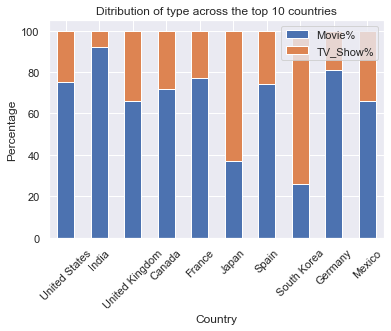

In [47]:
df_merge[['Movie%', 'TV_Show%']].plot(kind='bar', stacked=True)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title("Ditribution of type across the top 10 countries")
plt.xticks(range(len(df_merge)), df_merge['country'], rotation=45)
plt.show()

#### Content Preferences
- TV shows are more popular than movies in Asian countries , especially South Korea and Japan, where they account for more than 60% of the content.
- Movies are more popular than TV shows in European countries ,where they account for more than 65% of the content.
- India has the highest percentage of movies (92%) among all the countries, which may indicate a high demand for movies.
- North American countries have similar movie percentages (around 70%) and similar TV show percentages (around 30%) as each other,suggesting a similar preference or taste among these markets

### Best Month to launch a TV show/Movie


In [54]:
month_count = netflix_df.groupby('month_added')['type'].value_counts()
month_count.name = 'count'
month_count = month_count.reset_index()

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_count['month_added'] = pd.Categorical(month_count['month_added'], categories=months, ordered=True)
month_count.head()


,month_added,type,count
0,April,Movie,550
1,April,TV Show,215
2,August,Movie,519
3,August,TV Show,236
4,December,Movie,547


In [58]:
month_movie = month_count.loc[month_count['type'] == 'Movie'].sort_values(by = 'month_added')
month_tv = month_count.loc[month_count['type'] != 'Movie'].sort_values(by = 'month_added')

In [59]:
month_movie

,month_added,type,count
8,January,Movie,546
6,February,Movie,382
14,March,Movie,529
0,April,Movie,550
16,May,Movie,439
12,June,Movie,492
10,July,Movie,565
2,August,Movie,519
22,September,Movie,519
20,October,Movie,545


In [60]:
month_tv

,month_added,type,count
9,January,TV Show,195
7,February,TV Show,181
15,March,TV Show,214
1,April,TV Show,215
17,May,TV Show,193
13,June,TV Show,238
11,July,TV Show,263
3,August,TV Show,236
23,September,TV Show,252
21,October,TV Show,215


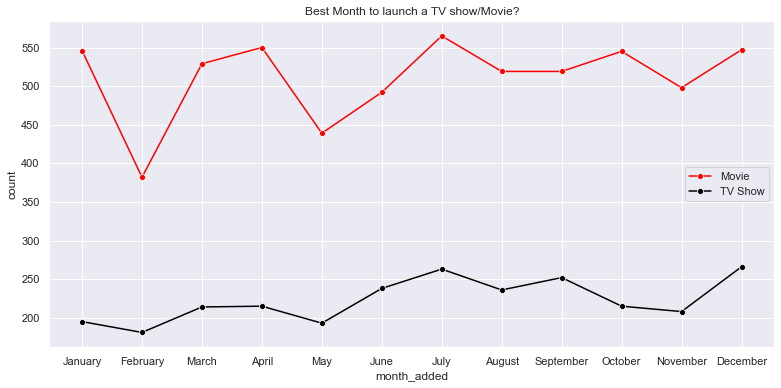

In [63]:
fig,ax = plt.subplots(figsize = (13,6))

sns.lineplot(data = month_movie, x = 'month_added', y = 'count',marker = 'o',color ='red',
 label = 'Movie',ax = ax)
sns.lineplot(data = month_tv, x = 'month_added', y = 'count',marker = 'o',color ='black',
 label = 'TV Show', ax = ax)
plt.legend(loc = 'center right')
ax.set_title('Best Month to launch a TV show/Movie?')
plt.show()


1. Consistent Patterns
- The monthly upload count of both Movies and TV shows exhibits a remarkably similar trend.
2. Seasonal Fluctuations
- There is a notable correlation between content uploads and holiday seasons, with January and December witnessing significant spikes in content additions.
- The months of July, August, October, and December record higher content upload counts, whereas February, May, and November experience comparatively lower counts.
- They may choose to focus on certain months or seasons to release high content and schedule fewer releases based on information about historical viewer preferences and behavior

##### avg difference between Movie/show released and date added

In [65]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')  # Convert to datetime, handle errors gracefully

# Create a new column for the difference in days
netflix_df['days_difference'] = (netflix_df['date_added'] - pd.to_datetime(netflix_df['release_year'], format='%Y')).dt.days

# Display the DataFrame with the new column
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,days_difference
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Saturday,633
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,Friday,266
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,Friday,266
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown cast,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,Friday,266
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,Friday,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019,November,Wednesday,4706
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown cast,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019,July,Monday,546
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019,November,Friday,3956
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020,January,Saturday,5123


In [72]:
mode_days_difference = netflix_df['days_difference'].mean()

#For movie
mode_df_days_diff_movies = netflix_df[netflix_df['type']=='Movie']
mode_days_diff_movies1 = mode_df_days_diff_movies['days_difference'].mean()

#For TV Show
mode_df_days_diff_tv = netflix_df[netflix_df['type']!='Movie']
mode_days_diff_tv1 = mode_df_days_diff_tv['days_difference'].mean()

print("Mode of days difference:", mode_days_difference)
print("Mode of days difference only movies:", mode_days_diff_movies1)
print("Mode of days difference only TV shows:", mode_days_diff_tv1)

Mode of days difference: 1895.345179970478
Mode of days difference only movies: 2273.142391127059
Mode of days difference only TV shows: 1029.7716741405081


##### Insights
- We can see the differences 
- Movies take time to be added but comparetively TV shows gets added early although only year is given we can take this insight

#### Movie/TV show released on year bases using histogram plot

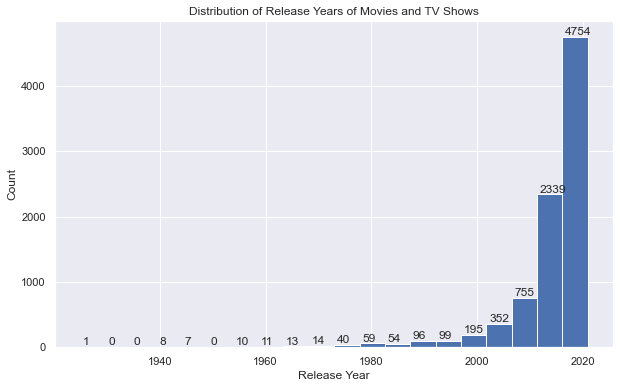

In [83]:
plt.figure(figsize=(10, 6))

# Filter out rows where 'release_year' is null
filtered_df = netflix_df.dropna(subset=['release_year'])

counts, bins, _ = plt.hist(filtered_df['release_year'], bins=20)


plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Release Years of Movies and TV Shows')

for count, bin_edge in zip(counts, bins):
    plt.text(bin_edge + 0.5, count, str(int(count)), ha='left', va='bottom')


plt.show()

##### Insights
- We can see that year by year the releases keep on increased.
- Particularly from 2000 to 2020 its increased in a exponential manner

## Genre Analysis

## Business Recommendations

#### Investment in Localized Content
- The data suggests that catering to local preferences is crucial for success. Netflix should continue to invest in producing content that resonates with different cultural and linguistic preferences around the world.
- Given the popularity of TV shows in Asian countries, Netflix should increase its investment in producing and acquiring Asian TVshows.
- Acknowledging the European preference for movies, Netflix should prioritize curating a diverse and engaging movie library that caters to the tastes of European viewers.
- Given the significant investment in content production in the USA and the emphasis on India, Netflix should continue to focus on these markets.

#### Strategic Release Timing
 * Monthly Strategy
- Focusing on releasing high-quality content during the months of January, July, August, October, and December could lead to increased viewer interest and engagement as these months have historically seen higher content upload counts, indicating higher demand during those periods.

#### Director and Cast Analysis Analysis
 - Netflix can see which director has done most movies which has highest rating
 - Same applies to cast as well so that Director and Cast fan base will be attracted for the same
 
#### Date Adding
 - Netflix has to release or add the TV show early and the difference shouldn't be more when compared to release as people will tend find ways to watch if its not coming early

#### Personal Recomendations

- As we can see TV shows adding is less when compared to Movies but Netflix has to increase the same as binge watch is more concentrated nowadays with all middle age group

